# Attempt to model using logreg, decision tree, random forest

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('tfidf_df.csv')

In [3]:
df.head()

,Unnamed: 0,aarthiga,abap,abi,abide,abor,above,absences,absolute,abstraction,...,zealand,zn,zos,zumba,zynga,zzybgllqg,âge,égard,équipes,will_apply
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [4]:
df=df.drop('Unnamed: 0', 1)

In [5]:
df.head()

,aarthiga,abap,abi,abide,abor,above,absences,absolute,abstraction,abstracts,...,zealand,zn,zos,zumba,zynga,zzybgllqg,âge,égard,équipes,will_apply
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#using simple train test split since the dataset is small
X = df.drop('will_apply', axis='columns')
y = df['will_apply'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.3)
lgr = LogisticRegression(max_iter=1000)
log_reg_tf = lgr.fit(X_train,y_train)
y_preds_log_reg_tf = log_reg_tf.predict(X_test)

In [8]:
from sklearn.metrics import classification_report
report_log_reg_tf = classification_report(y_test, y_preds_log_reg_tf)
print(report_log_reg_tf)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        78
           1       0.72      1.00      0.84       199

    accuracy                           0.72       277
   macro avg       0.36      0.50      0.42       277
weighted avg       0.52      0.72      0.60       277



C:\Users\green\anaconda3\envs\machinelearning\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


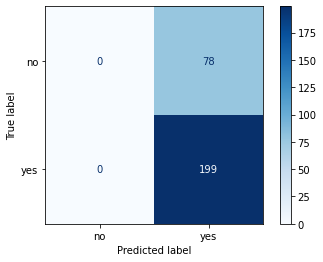

In [9]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_reg_tf, X_test, y_test, cmap=plt.cm.Blues, display_labels = ['no', 'yes'], values_format = '')